In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

Perform EDA Analysis

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


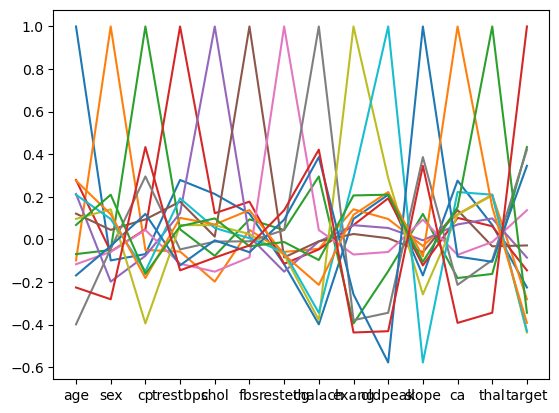

In [6]:
plt.plot(df.corr())

<AxesSubplot:>

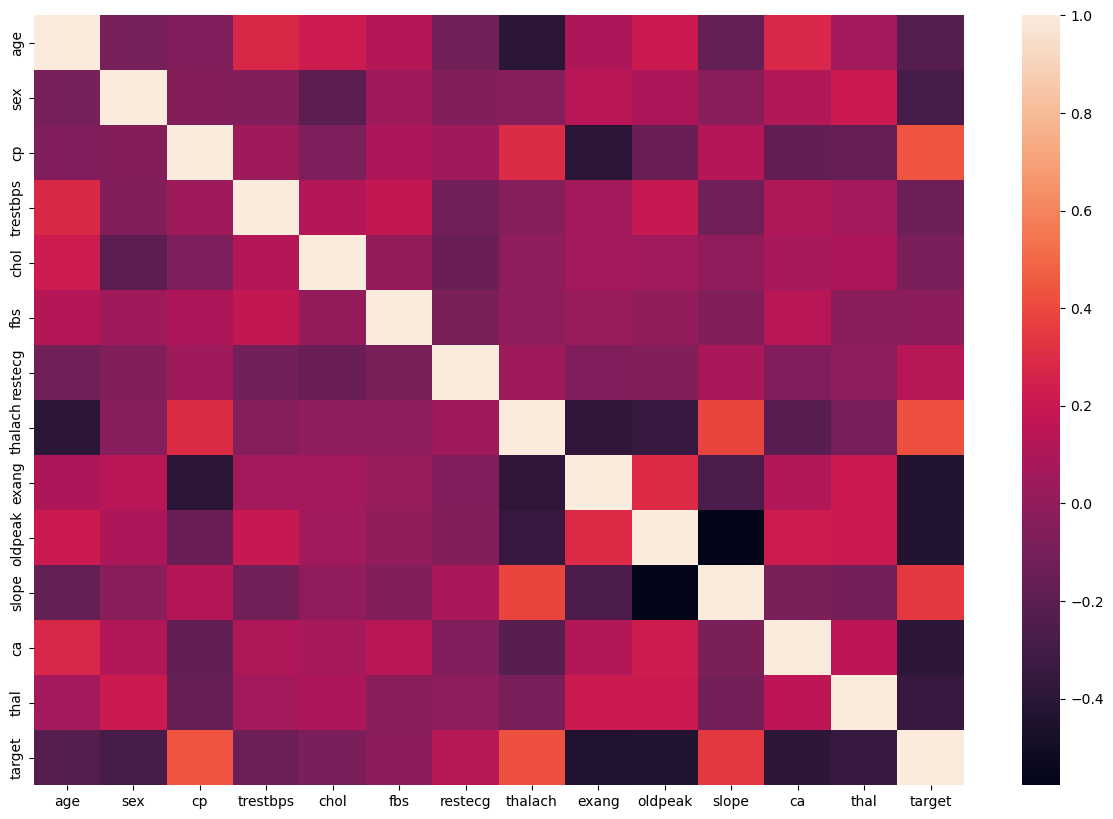

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

<AxesSubplot:ylabel='Density'>

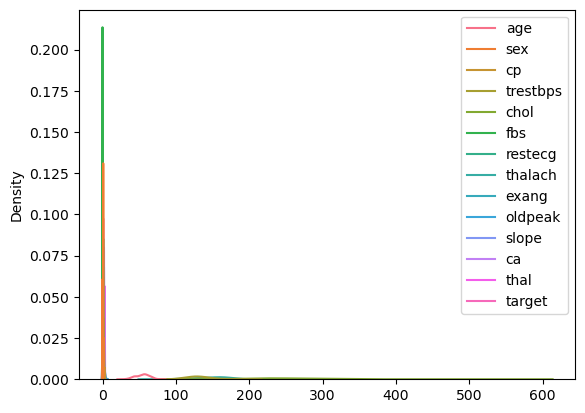

In [8]:
sns.kdeplot(df)

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:>

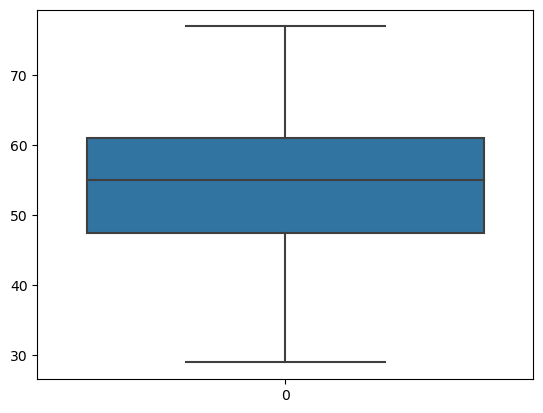

In [10]:
sns.boxplot(df['age'])

In [11]:
x = df.drop('target',axis =1)
y = df['target']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

Without Hypertuning

In [13]:
Decision_clf = DecisionTreeClassifier()
Decision_clf.fit(x_train,y_train)

In [24]:
Decision_clf.fit(x_train,y_train)

DecisionTreeClassifier()

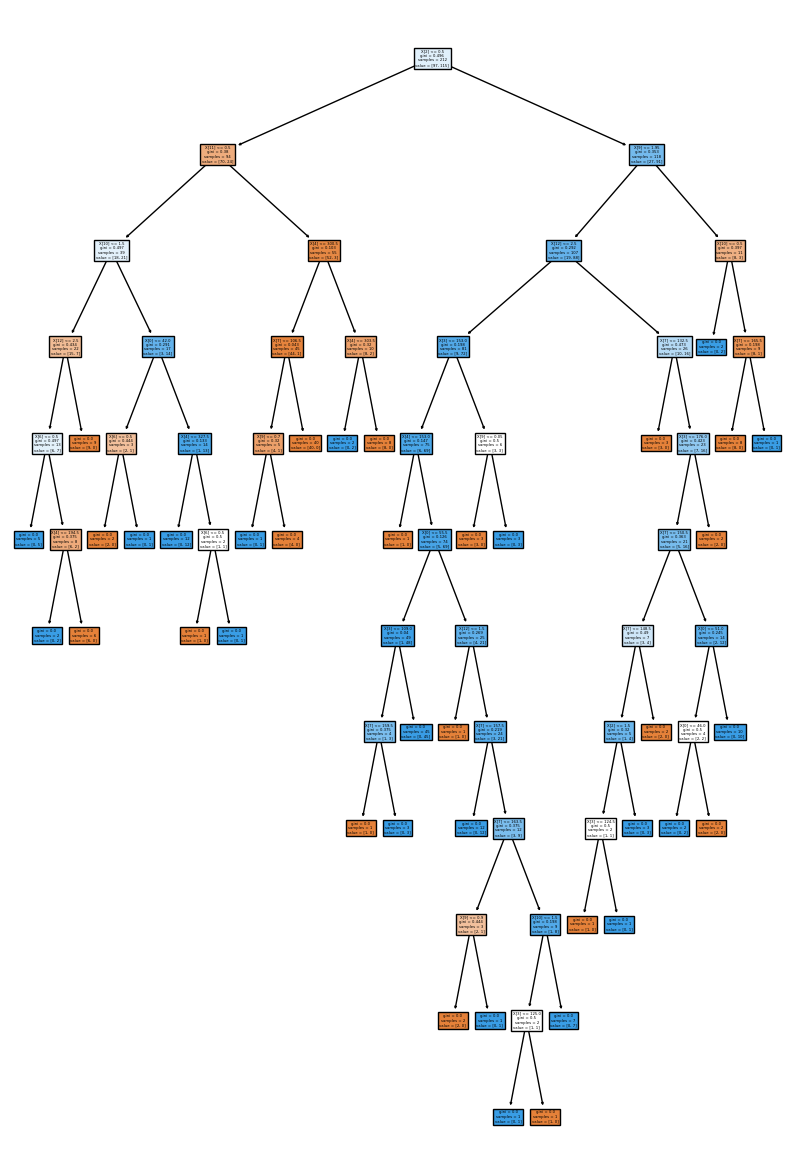

In [30]:
plt.figure(figsize=(10,15))
tree.plot_tree(Decision_clf,filled =True)
plt.savefig('without.png')

Model Evaluation

In [15]:
# Evaluation on Test Data
y_pred = Decision_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:",cnf_matrix)



accuracy =accuracy_score(y_test,y_pred)
print('Accuracy is :',accuracy)

report = classification_report(y_test,y_pred)
print("Classification report is :",report)

Confusion Matrix is: [[32  9]
 [13 37]]
Accuracy is : 0.7582417582417582
Classification report is :               precision    recall  f1-score   support

           0       0.71      0.78      0.74        41
           1       0.80      0.74      0.77        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [16]:
#Evaluation on Training
y_pred_train = Decision_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix is:",cnf_matrix)



accuracy =accuracy_score(y_train,y_pred_train)
print('Accuracy is :',accuracy)

report = classification_report(y_train,y_pred_train)
print("Classification report is :",report)

Confusion Matrix is: [[ 97   0]
 [  0 115]]
Accuracy is : 1.0
Classification report is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


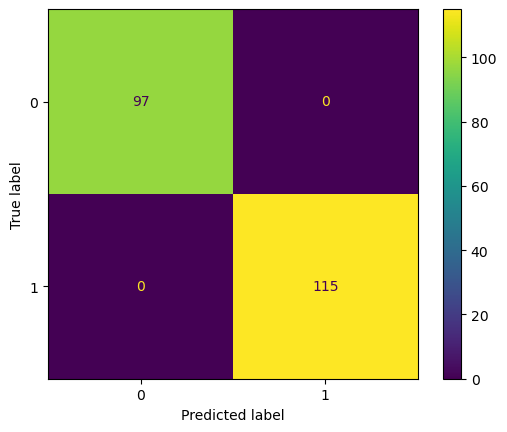

In [17]:
plot_confusion_matrix(Decision_clf,x_train,y_train)

C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


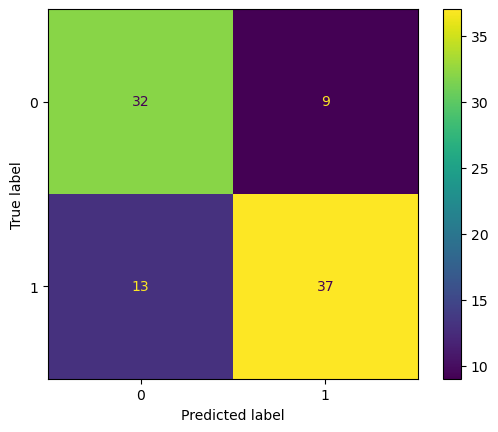

In [18]:
plot_confusion_matrix(Decision_clf,x_test,y_test)

With Hypertuning

In [32]:
Decision_clf = DecisionTreeClassifier()
hyperparameter={'criterion':['gini','entropy'],
                'max_depth':np.arange(3,8),
                'min_samples_split':np.arange(2,20),
                'min_samples_leaf':np.arange(2,15)}

gscv_dt = GridSearchCV(Decision_clf,hyperparameter,cv=5)
gscv_dt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [33]:
gscv_dt.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=6)

In [34]:
#Evaluation on testing
Decision_clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=6)
Decision_clf.fit(x_train,y_train)

y_hyper_pred = Decision_clf.predict(x_test)


cnf_matrix = confusion_matrix(y_test,y_hyper_pred)
print("Confusion Matrix is:",cnf_matrix)



accuracy =accuracy_score(y_test,y_hyper_pred)
print('Accuracy is :',accuracy)

report = classification_report(y_test,y_hyper_pred)
print("Classification report is :",report)

Confusion Matrix is: [[33  8]
 [14 36]]
Accuracy is : 0.7582417582417582
Classification report is :               precision    recall  f1-score   support

           0       0.70      0.80      0.75        41
           1       0.82      0.72      0.77        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



In [35]:
#Evaluation on training


y_hyper_pred_train = Decision_clf.predict(x_train)


cnf_matrix = confusion_matrix(y_train,y_hyper_pred_train)
print("Confusion Matrix is:",cnf_matrix)



accuracy =accuracy_score(y_train,y_hyper_pred_train)
print('Accuracy is :',accuracy)

report = classification_report(y_train,y_hyper_pred_train)
print("Classification report is :",report)

Confusion Matrix is: [[ 85  12]
 [ 13 102]]
Accuracy is : 0.8820754716981132
Classification report is :               precision    recall  f1-score   support

           0       0.87      0.88      0.87        97
           1       0.89      0.89      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



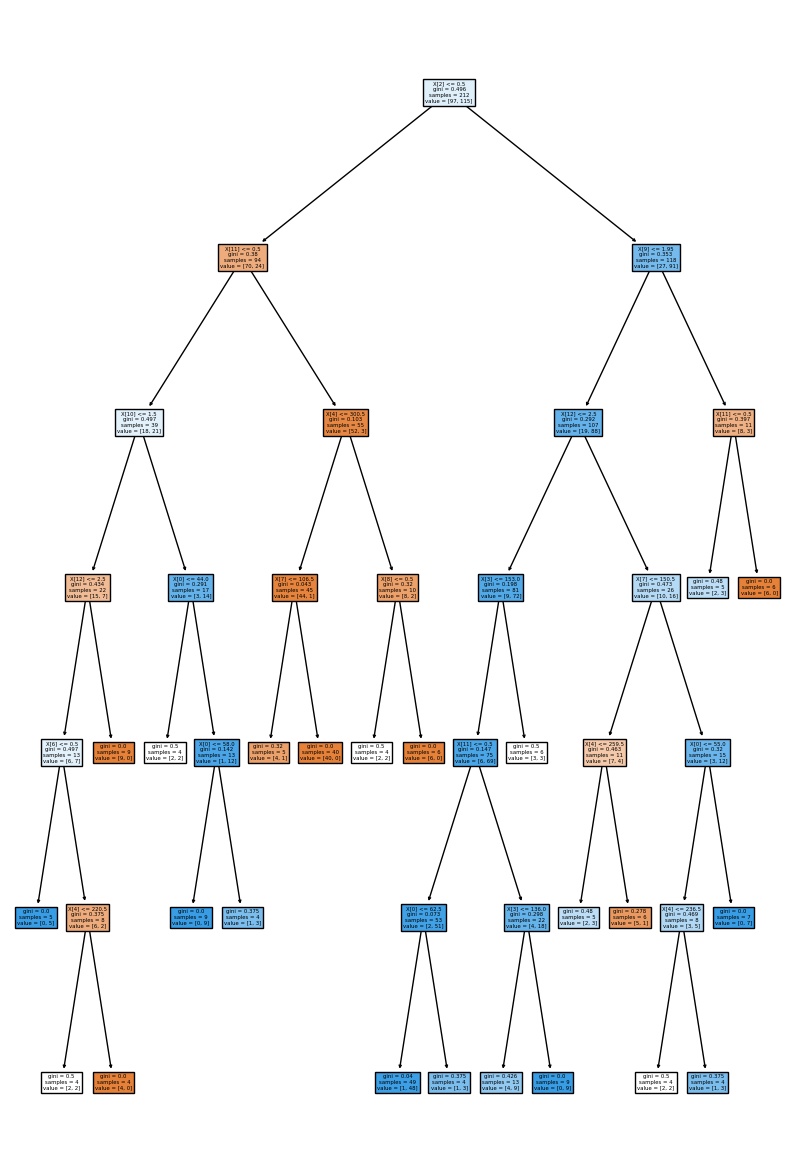

In [37]:
plt.figure(figsize=(10,15))
tree.plot_tree(Decision_clf,filled=True)
plt.savefig('with.png')

Pruning

In [38]:
decision_tree_model =DecisionTreeClassifier(random_state=1)
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [40]:
result = decision_tree_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00377358, 0.00419287, 0.00438005, 0.00461216,
       0.00462072, 0.0052711 , 0.00628931, 0.00709793, 0.00809281,
       0.00825802, 0.00838574, 0.00876691, 0.01000039, 0.01169811,
       0.01211586, 0.01219745, 0.01388983, 0.01415094, 0.01543739,
       0.0231037 , 0.02843441, 0.05041197, 0.13135425])